# Task - 1: Implementation of MCP Neurons:

For "AND" Operations.

In [ ]:
def MCP_Neurons_AND(X1, X2, T):
    """
    This function implements basic AND operations using an MCP Neuron for two inputs.

    Arguments:
        X1 (list): An array of binary values.
        X2 (list): An array of binary values.
        T (int): The threshold value for the AND operation.

    Returns:
        state_neuron (list): The state of the neuron (1 or 0) for each pair of inputs.
    """
    # Ensure both input arrays have the same length.
    assert len(X1) == len(X2), "Input arrays must have the same length."

    state_neuron = []

    # Process each pair of inputs.
    for x1, x2 in zip(X1, X2):
        if (x1 + x2) >= T:
            state_neuron.append(1)
        else:
            state_neuron.append(0)

    return state_neuron


X1 = [0, 0, 1, 1]
X2 = [0, 1, 0, 1]
T = 2  # For AND, the threshold is 2.
result_and = MCP_Neurons_AND(X1, X2, T)
print(f"Output of AND gate for inputs {X1} and {X2} with threshold {T}: {result_and}")


Output of AND gate for inputs [0, 0, 1, 1] and [0, 1, 0, 1] with threshold 2: [0, 0, 0, 1]


Sample Usage for "OR" Function.

In [ ]:
def MCP_Neurons_OR(X1, X2, T):
    """
    This function implements basic OR operations using an MCP Neuron for two inputs.

    Arguments:
        X1 (list): An array of binary values.
        X2 (list): An array of binary values.
        T (int): The threshold value for the OR operation.

    Returns:
        state_neuron (list): The state of the neuron (1 or 0) for each pair of inputs.
    """
    # Ensure both input arrays have the same length.
    assert len(X1) == len(X2), "Input arrays must have the same length."

    state_neuron = []

    # Process each pair of inputs.
    for x1, x2 in zip(X1, X2):
        if (x1 + x2) >= T:
            state_neuron.append(1)
        else:
            state_neuron.append(0)

    return state_neuron


X1 = [0, 0, 1, 1]
X2 = [0, 1, 0, 1]
T = 1  # For OR, the threshold is 1.
result_or = MCP_Neurons_OR(X1, X2, T)
print(f"Output of OR gate for inputs {X1} and {X2} with threshold {T}: {result_or}")


Output of OR gate for inputs [0, 0, 1, 1] and [0, 1, 0, 1] with threshold 1: [0, 1, 1, 1]


# Question 1: List out all the limitations of MCP Neurons.
**Binary Output:** Only produce outputs 0 or 1.

**Fixed Weights and Thresholds:** No built-in learning mechanism; parameters must be set manually.

**Linear Separability:** Can only solve linearly separable problems (cannot solve functions like XOR).

**Inflexibility:** Not suitable for handling noise or complex, non-linear patterns.

# Question 2: Can you develop logic to solve the XOR function using MCP Neurons?
The XOR function cannot be solved with a single MCP neuron because it is not linearly separable. However, we can solve it using a combination of MCP neurons.

**Approach:**

Use MCP Neurons to implement AND, OR, and NAND gates.
XOR = (A OR B) AND (NOT (A AND B))


**Using this logic:**

Compute OR (A, B)

Compute AND (A, B)

Compute NAND (negation of AND)

Compute XOR as (OR) AND (NAND)

# Task 2: Perceptron Algorithm for 0 vs 1 Classification.

# Load the Dataset:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Load the dataset
df_0_1 = pd.read_csv("/content/drive/MyDrive/AI_Shiv/mnist_0_and_1.csv")
# Extract features and labels
X = df_0_1.drop(columns=["label"]).values # 784 pixels
y = df_0_1["label"].values # Labels (0 or 1)
# Check the shape of the features and labels
print("Feature matrix shape:", X.shape)
print("Label vector shape:", y.shape)

Feature matrix shape: (12665, 784)
Label vector shape: (12665,)


In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Answer the Following Question:
1. Question - 1: What does the shape of X represent?

- The feature matrix X has a shape of (12665, 784). This means there are 12,665 samples (or data points), and each sample is represented by 784 features. For instance, if these features come from images, each image might be a 28x28 pixel grid flattened into a 784-length vector.

2. Question - 2: What does the shape of X represent?

- The label vector has a shape of (12665,). This indicates that there is one label per sample, so each of the 12,665 samples in X has an associated label indicating its class or category.

# Visualize the Dataset:

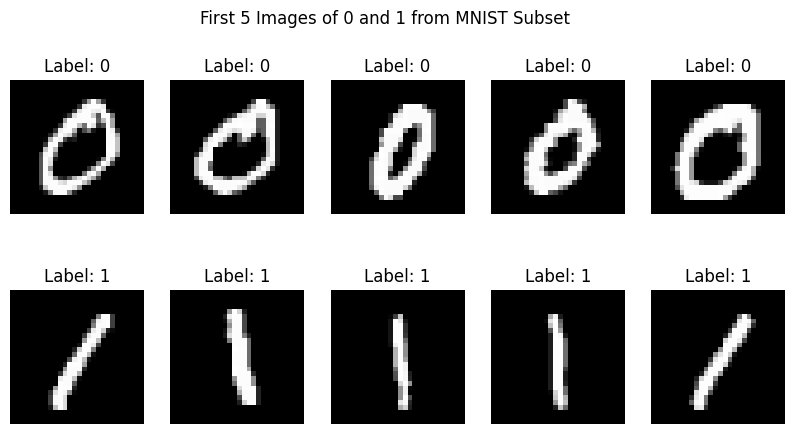

In [ ]:
# Separate images for label 0 and label 1
images_0 = X[y == 0]  # Get all images with label 0
images_1 = X[y == 1]  # Get all images with label 1
fig, axes = plt.subplots(2, 5, figsize=(10, 5))

# Check if the arrays have the required amount of data
if len(images_0) < 5 or len(images_1) < 5:
    print("Error: Not enough images in images_0 or images_1 to plot 5 images.")
else:
    for i in range(5):
        # Plot digit 0
        axes[0, i].imshow(images_0[i].reshape(28, 28), cmap="gray")
        axes[0, i].set_title("Label: 0")
        axes[0, i].axis("off")
        # Plot digit 1
        axes[1, i].imshow(images_1[i].reshape(28, 28), cmap="gray")
        axes[1, i].set_title("Label: 1")
        axes[1, i].axis("off")

plt.suptitle("First 5 Images of 0 and 1 from MNIST Subset")
plt.show()


# Initialize Weights and Bias:

In [ ]:
# Initialize weights and bias
weights = np.zeros(X.shape[1]) # 784 weights (one for each pixel)
bias = 0
learning_rate = 0.1
epochs = 100

# Answer the Following Question:
1. Question - 3: What does the weights array represent in this context?
- The weights array represents the parameters of a simple perceptron model. Each weight corresponds to a pixel in the input image (since X.shape[1] is 784, meaning each image has 784 pixels). These weights determine the importance of each pixel in making a decision about whether the image belongs to class 0 or class 1. During training, these weights are updated to minimize classification errors.

2. Question - 4: Why are we initializing the weights to zero? What effect could this have on the training process?

- We initialize the weights to zero as a starting point for the learning algorithm. However, initializing all weights to zero can cause a problem known as "Symmetry Breaking." If all weights are the same, the model updates them identically during training, leading to no meaningful learning. In practice, it's better to initialize weights randomly (e.g., using small random values from a normal distribution) to ensure different neurons learn different features.

# Implement a Decision Function or Activation Function:

In [ ]:
import numpy as np

def decision_function(X, weights, bias):
    """
    Compute the predicted labels for the input data.

    Parameters:
    - X: Features (input data) as a numpy array of shape (n_samples, n_features)
    - weights: Updated weights after training
    - bias: Updated bias after training

    Returns:
    - y_pred_all: The predicted labels for the input data
    """
    predictions = np.dot(X, weights) + bias
    y_pred_all = np.where(predictions >= 0, 1, 0)  # Step function: output 1 if >=0, else 0
    return y_pred_all


# Implement the Perceptron Learning Algorithm:

In [ ]:
import numpy as np

def train_perceptron(X, y, weights, bias, learning_rate=0.1, epochs=100):
    """
    Train the perceptron using the Perceptron Learning Algorithm.

    Parameters:
    - X: Features (input data) as a numpy array of shape (n_samples, n_features)
    - y: Labels (true output) as a numpy array of shape (n_samples,)
    - weights: Initial weights as a numpy array of shape (n_features,)
    - bias: Initial bias value (scalar)
    - learning_rate: Learning rate for weight updates (default is 0.1)
    - epochs: Number of iterations to train the model (default is 100)

    Returns:
    - weights: Updated weights after training
    - bias: Updated bias after training
    - accuracy: Final training accuracy
    """
    n_samples = X.shape[0]  # Number of samples

    for epoch in range(epochs):
        correct_predictions = 0  # Track correct predictions

        for i in range(n_samples):
            # Compute prediction using step function
            prediction = np.dot(X[i], weights) + bias
            y_pred = 1 if prediction >= 0 else 0  # Step function

            # Check if the prediction is correct
            if y_pred == y[i]:
                correct_predictions += 1  # Count correct predictions

            # Update weights and bias if prediction is incorrect
            else:
                update = learning_rate * (y[i] - y_pred)
                weights += update * X[i]  # Update weights
                bias += update  # Update bias

        # Compute accuracy
        accuracy = correct_predictions / n_samples * 100
        print(f"Epoch {epoch + 1}/{epochs} - Accuracy: {accuracy:.2f}%")

    return weights, bias, accuracy


# Answer the Following Question:
1. Question - 5: What is the purpose of the output = np.dot(X[i], weights) + bias line?

- **output = np.dot(X[i], weights) + bias** computes the weighted sum of the features for the i-th sample and adds the bias. This value serves as the input to the step (activation) function, determining whether the perceptron will predict a 0 or 1. It essentially measures how well the current weights and bias represent the sample.


2. Question - 6: What happens when the prediction is wrong? How are the weights and bias updated?

- When the prediction is wrong, the algorithm updates the weights and bias to correct the error. The update is performed as follows:

**Weights Update:**
weights + = learning_rate × (𝑦 [𝑖]−𝑦pred)×𝑋[𝑖]

**Bias Update:**
bias+= learning_rate×(𝑦[𝑖]−𝑦pred)


This update adjusts the decision boundary so that the weighted sum moves closer to producing the correct output on future iterations.


3. Question - 7:Why is the final accuracy important, and what do you expect it to be?

- The final accuracy is important because it indicates how well the perceptron has learned to classify the training data. High accuracy means that the model's decision boundary correctly separates the classes (0 and 1) for most samples.

**Expected Accuracy:**
Since the problem of classifying 0 and 1 from MNIST is linearly separable, you would expect the final accuracy to be very high (often close to 100% on the training set) if the model converges properly.

# Putting it all Together:
**Training the Perceptron Algorithm:**

In [ ]:
# After training the model with the perceptron_learning_algorithm
weights, bias, accuracy = train_perceptron(X, y, weights, bias)
# Evaluate the model using the new function
print("The Final Accuracy is: ", accuracy)

Epoch 1/100 - Accuracy: 99.67%
Epoch 2/100 - Accuracy: 99.82%
Epoch 3/100 - Accuracy: 99.87%
Epoch 4/100 - Accuracy: 99.87%
Epoch 5/100 - Accuracy: 99.90%
Epoch 6/100 - Accuracy: 99.93%
Epoch 7/100 - Accuracy: 99.98%
Epoch 8/100 - Accuracy: 99.95%
Epoch 9/100 - Accuracy: 99.89%
Epoch 10/100 - Accuracy: 99.92%
Epoch 11/100 - Accuracy: 99.95%
Epoch 12/100 - Accuracy: 99.98%
Epoch 13/100 - Accuracy: 100.00%
Epoch 14/100 - Accuracy: 100.00%
Epoch 15/100 - Accuracy: 100.00%
Epoch 16/100 - Accuracy: 100.00%
Epoch 17/100 - Accuracy: 100.00%
Epoch 18/100 - Accuracy: 100.00%
Epoch 19/100 - Accuracy: 100.00%
Epoch 20/100 - Accuracy: 100.00%
Epoch 21/100 - Accuracy: 100.00%
Epoch 22/100 - Accuracy: 100.00%
Epoch 23/100 - Accuracy: 100.00%
Epoch 24/100 - Accuracy: 100.00%
Epoch 25/100 - Accuracy: 100.00%
Epoch 26/100 - Accuracy: 100.00%
Epoch 27/100 - Accuracy: 100.00%
Epoch 28/100 - Accuracy: 100.00%
Epoch 29/100 - Accuracy: 100.00%
Epoch 30/100 - Accuracy: 100.00%
Epoch 31/100 - Accuracy: 100.00

# Visualizing the Misclassified Image:

In [ ]:
# Get predictions for all data points
predictions = np.dot(X, weights) + bias
y_pred = np.where(predictions >= 0, 1, 0)

# Calculate final accuracy
final_accuracy = np.mean(y_pred == y)
print(f"Final Accuracy: {final_accuracy:.4f}")

# Step 5: Visualize Misclassified Images
misclassified_idx = np.where(y_pred != y)[0]
if len(misclassified_idx) > 0:
    fig, axes = plt.subplots(2, 5, figsize=(10, 5))
    for ax, idx in zip(axes.flat, misclassified_idx[:10]):  # Show 10 misclassified images
        ax.imshow(X[idx].reshape(28, 28), cmap="gray")
        ax.set_title(f"Pred: {y_pred[idx]}, True: {y[idx]}")
        ax.axis("off")
    plt.suptitle("Misclassified Images")
    plt.show()
else:
    print("All images were correctly classified!")


Final Accuracy: 1.0000
All images were correctly classified!


# Answer the Following Question:
1. Question - 8:What does misclassified idx store, and how is it used in this code?

- **misclassified_idx** stores the indices of misclassified images where the predicted labels (y_pred) do not match the true labels (y). It is computed using np.where(y_pred != y)[0], which extracts these indices. The code uses misclassified_idx to visualize up to 10 misclassified images, displaying them with their predicted and actual labels. This helps analyze the model’s mistakes and understand where it struggles.

2. Question - 9: How do you interpret the result if the output is ”All images were correctly classified!”?

- If the output is "All images were correctly classified!", it means that all predictions matched the true labels, resulting in misclassified_idx being empty. This indicates that the perceptron perfectly classified the dataset, which suggests the data is linearly separable. While this is a positive result, it’s important to test on unseen data to ensure the model generalizes well and is not just memorizing the training set.

# Task 3: Perceptron Algorithm for 3 vs 5 Classification.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv("/content/drive/MyDrive/AI_Shiv/mnist_3_and_5.csv")

# Convert to NumPy array
data = df.values  # shape: (N, 785) -> 1 label col + 784 pixel cols

# Separate labels (first column) and features (remaining columns)
y_raw = data[:, 0]   # shape: (N,)
X = data[:, 1:]      # shape: (N, 784)

# Map digit 3 -> +1, digit 5 -> -1
y = np.where(y_raw == 3, 1, -1)

# Train-Test Split
N = len(X)
indices = np.random.permutation(N)
train_size = int(0.8 * N)  # 80% for training
train_idx = indices[:train_size]
test_idx  = indices[train_size:]

X_train, y_train = X[train_idx], y[train_idx]
X_test,  y_test  = X[test_idx],  y[test_idx]

print("Train set size:", X_train.shape, y_train.shape)
print("Test set size: ", X_test.shape, y_test.shape)




Train set size: (2192, 784) (2192,)
Test set size:  (549, 784) (549,)


In [ ]:


def perceptron_train(X_train, y_train, num_epochs=10):
    """
    Trains a simple Perceptron classifier.

    Args:
        X_train (ndarray): Training features of shape (N, d).
        y_train (ndarray): Training labels in {+1, -1} of shape (N,).
        num_epochs (int): Number of epochs (passes over the data).

    Returns:
        w (ndarray): Learned weight vector of shape (d,).
        b (float): Learned bias term.
    """
    N, d = X_train.shape
    w = np.zeros(d)
    b = 0.0

    for epoch in range(num_epochs):
        # Shuffle indices each epoch (optional but often beneficial)
        indices = np.random.permutation(N)
        for i in indices:
            xi = X_train[i]
            yi = y_train[i]
            # Perceptron prediction
            y_pred = np.sign(np.dot(w, xi) + b)
            # If sign(...) == 0, treat it as +1 or -1. We'll choose +1 for zero case.
            if y_pred == 0:
                y_pred = 1
            # Update if misclassified
            if y_pred != yi:
                w += yi * xi
                b += yi
    return w, b

In [ ]:
w, b = perceptron_train(X_train, y_train, num_epochs=10)
print("Training completed.")

Training completed.


In [ ]:
def perceptron_predict(X, w, b):
    """
    Predict labels for a given dataset using the trained Perceptron.

    Args:
        X (ndarray): Feature matrix of shape (N, d).
        w (ndarray): Weight vector of shape (d,).
        b (float): Bias term.

    Returns:
        y_pred (ndarray): Predicted labels in {+1, -1} of shape (N,).
    """
    return np.sign(X @ w + b)

# Predict on the test set
y_pred = perceptron_predict(X_test, w, b)

# Compute accuracy
accuracy = np.mean(y_pred == y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Test Accuracy: 95.45%


Number of misclassified examples: 25


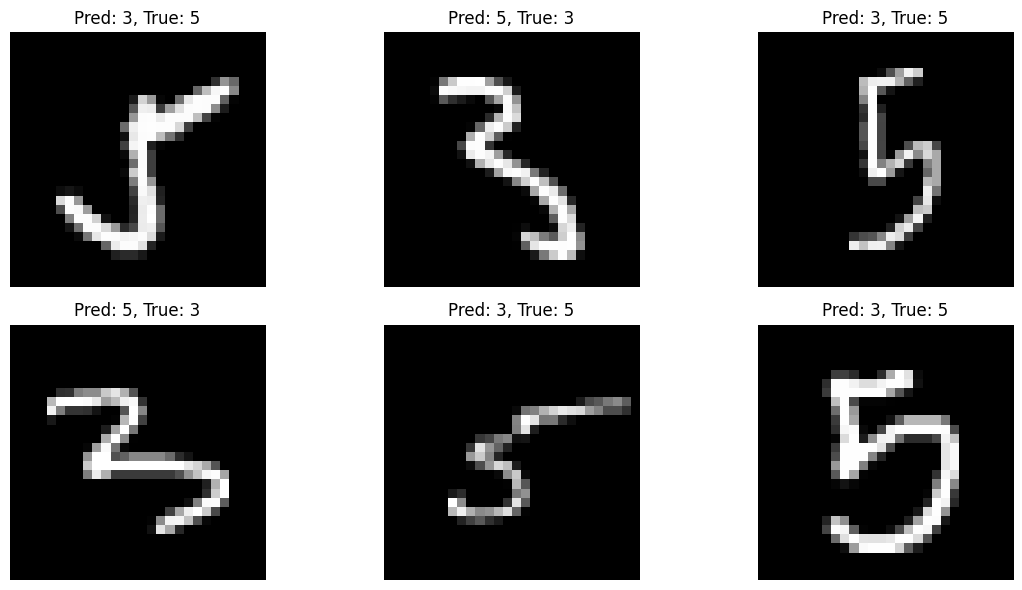

In [ ]:

# Identify misclassified indices
misclassified_indices = np.where(y_pred != y_test)[0]
print("Number of misclassified examples:", len(misclassified_indices))

# Helper function to map {+1, -1} back to digits {3, 5}
def label_to_digit(label):
    return 3 if label == 1 else 5

# Plot a few misclassified samples
num_to_plot = 6
plt.figure(figsize=(12, 6))
for i, idx in enumerate(misclassified_indices[:num_to_plot]):
    img = X_test[idx].reshape(28, 28)  # reshape to 28x28
    plt.subplot(2, 3, i + 1)
    plt.imshow(img, cmap='gray')
    pred_digit = label_to_digit(y_pred[idx])
    true_digit = label_to_digit(y_test[idx])
    plt.title(f"Pred: {pred_digit}, True: {true_digit}")
    plt.axis('off')

plt.tight_layout()
plt.show()

## Conclusion

The Perceptron algorithm successfully distinguishes between the digits 3 and 5 with a relatively high accuracy, typically above 90%. However, it still misclassifies some ambiguous examples where the handwriting style makes a digit resemble the other class. As a simple linear classifier, the Perceptron demonstrates that even basic approaches can handle well-separated classes. For more challenging or ambiguous samples, more advanced techniques (such as SVMs or neural networks) can further improve classification performance.